In [1]:
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms as transforms
import json
import os
import torch
from torchvision.datasets import VisionDataset
from torchvision.datasets.utils import check_integrity, download_and_extract_archive



batch_size = 4
client_aug = 2
augment= False
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")


In [2]:
import gc
gc.collect()
torch.cuda.empty_cache()

import warnings
warnings.filterwarnings('ignore')

In [5]:
train_dir = "/home/siu856542507/zarif/FL-Violence/Train"
test_dir = "/home/siu856542507/zarif/FL-Violence/Test"

SEED = 12
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 16      #Was 46
EPOCHS = 1
LR =  0.00003
NUM_CLASSES = 14
CLASS_LABELS = ['Abuse','Arrest','Arson','Assault','Burglary','Explosion','Fighting',"Normal",'RoadAccidents','Robbery','Shooting','Shoplifting','Stealing','Vandalism']

crime_types=os.listdir(train_dir)
n=len(crime_types)
print("Number of crime categories : ",n)

Number of crime categories :  14


In [ ]:
train_loader = torch.utils.data.DataLoader(
        datasets.ImageFolder(train2, transform=transforms.ToTensor()),
        batch_size=16,
        shuffle=True,
    )

In [4]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

def non_iid_split(dataset, nb_nodes, n_samples_per_node, batch_size, shuffle, shuffle_digits=False):
    assert(nb_nodes>0 and nb_nodes<=10)

    digits=torch.arange(10) if shuffle_digits==False else torch.randperm(10, generator=torch.Generator().manual_seed(0))
    digits2=torch.arange(3) if shuffle_digits==False else torch.randperm(10, generator=torch.Generator().manual_seed(0))

    digits = torch.cat((digits,digits2))

    print(digits)
   
    digits_split=list()
    i=0
    for n in range(nb_nodes, 0, -1):
        inc=int((10-i)/n)
        digits_split.append(digits[i:i+3])
        print
        i+=inc
        print(inc)
        print(digits_split)
    
    print(digits_split)
    # load and shuffle nb_nodes*n_samples_per_node from the dataset
    loader = torch.utils.data.DataLoader(dataset,
                                        batch_size=nb_nodes*n_samples_per_node,
                                        shuffle=shuffle)
    dataiter = iter(loader)
    images_train_mnist, labels_train_mnist = next(dataiter)

    data_splitted=list()
    for i in range(nb_nodes):
        idx=torch.stack([y_ == labels_train_mnist for y_ in digits_split[i]]).sum(0).bool() # get indices for the digits
        data_splitted.append(torch.utils.data.DataLoader(torch.utils.data.TensorDataset(images_train_mnist[idx], labels_train_mnist[idx]), batch_size=batch_size, shuffle=shuffle))
    print(data_splitted)
    return data_splitted



def iid_split(dataset, nb_nodes, n_samples_per_node, batch_size, shuffle):
    # load and shuffle n_samples_per_node from the dataset
    loader = torch.utils.data.DataLoader(dataset,
                                        batch_size=n_samples_per_node,
                                        shuffle=shuffle)
    dataiter = iter(loader)
    
    data_splitted=list()
    for _ in range(nb_nodes):
        data_splitted.append(torch.utils.data.DataLoader(torch.utils.data.TensorDataset(*(next(dataiter))), batch_size=batch_size, shuffle=shuffle))

    return data_splitted


def  get_MNIST(type="iid", n_samples_train=200, n_samples_test=100, n_clients=3, batch_size=25, shuffle=True):
    dataset_loaded_train = datasets.MNIST(
            root="./data",
            train=True,
            download=True,
            transform=transforms.ToTensor()
    )
    dataset_loaded_test = datasets.MNIST(
            root="./data",
            train=False,
            download=True,
            transform=transforms.ToTensor()
    )

    if type=="iid":
        train=iid_split(dataset_loaded_train, n_clients, n_samples_train, batch_size, shuffle)
        test=iid_split(dataset_loaded_test, n_clients, n_samples_test, batch_size, shuffle)
    elif type=="non_iid":
        train=non_iid_split(dataset_loaded_train, n_clients, n_samples_train, batch_size, shuffle)
        test=non_iid_split(dataset_loaded_test, n_clients, n_samples_test, batch_size, shuffle)
    else:
        train=[]
        test=[]

    return train, test
def  get_LISA(type="iid", n_samples_train=200, n_samples_test=100, n_clients=3, batch_size=4, shuffle=True):
    transform = transforms.Compose(
    [    transforms.ToPILImage(),
     transforms.ToTensor(),
     transforms.Normalize((0.4563, 0.4076, 0.3895), (0.2298, 0.2144, 0.2259))])
    
    dataset_loaded_train = LISA(root='./data', download=True, train=True,transform=transform)
    dataset_loaded_test = LISA(root='./data', download=True, train=False,transform=transform)

    if type=="iid":
        train=iid_split(dataset_loaded_train, n_clients, n_samples_train, batch_size, shuffle)
        test=iid_split(dataset_loaded_test, n_clients, n_samples_test, batch_size, shuffle)
    elif type=="non_iid":
        train=non_iid_split(dataset_loaded_train, n_clients, n_samples_train, batch_size, shuffle)
        test=non_iid_split(dataset_loaded_test, n_clients, n_samples_test, batch_size, shuffle)
    else:
        train=[]
        test=[]

    return train, test
def  get_CIFAR(type="iid", n_samples_train=200, n_samples_test=100, n_clients=3, batch_size=25, shuffle=True):
        dataset_loaded_train = datasets.CIFAR10(
            root="./data",
            train=True,
            download=True,
            transform=transforms.ToTensor()
    )
        dataset_loaded_test = datasets.CIFAR10(
            root="./data",
            train=False,
            download=True,
            transform=transforms.ToTensor()
    )
        if type=="iid":
            train=iid_split(dataset_loaded_train, n_clients, n_samples_train, batch_size, shuffle)
            test=iid_split(dataset_loaded_test, n_clients, n_samples_test, batch_size, shuffle)
        elif type=="non_iid":
            train=non_iid_split(dataset_loaded_train, n_clients, n_samples_train, batch_size, shuffle)
            test=non_iid_split(dataset_loaded_test, n_clients, n_samples_test, batch_size, shuffle)
        else:
            train=[]
            test=[]

        return train, test
    
def  get_FASHION(type="iid", n_samples_train=200, n_samples_test=100, n_clients=3, batch_size=25, shuffle=True):
        dataset_loaded_train = datasets.FashionMNIST(
            root="./data",
            train=True,
            download=True,
            transform=transforms.ToTensor()
    )
        dataset_loaded_test = datasets.FashionMNIST(
            root="./data",
            train=False,
            download=True,
            transform=transforms.ToTensor()
    )
        if type=="iid":
            train=iid_split(dataset_loaded_train, n_clients, n_samples_train, batch_size, shuffle)
            test=iid_split(dataset_loaded_test, n_clients, n_samples_test, batch_size, shuffle)
        elif type=="non_iid":
            train=non_iid_split(dataset_loaded_train, n_clients, n_samples_train, batch_size, shuffle)
            test=non_iid_split(dataset_loaded_test, n_clients, n_samples_test, batch_size, shuffle)
        else:
            train=[]
            test=[]

        return train, test
def plot_samples(data, channel:int, title=None, plot_name="", n_examples =20):

    n_rows = int(n_examples / 5)
    plt.figure(figsize=(1* n_rows, 1*n_rows))
    if title: plt.suptitle(title)
    X, y= data
    for idx in range(n_examples):
        
        ax = plt.subplot(n_rows, 5, idx + 1)

        image = 255 - X[idx, channel].view((32,32))
        ax.imshow(image, cmap='gist_gray')
        ax.axis("off")

    if plot_name!="":plt.savefig(f"plots/"+plot_name+".png")

    plt.tight_layout()

In [5]:
# batch_size = 8
# # client_aug = 12
# epochs = 8
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

In [7]:
pip install mealpy

Note: you may need to restart the kernel to use updated packages.


In [8]:
from mealpy.swarm_based.GWO import RW_GWO
from mealpy.swarm_based.GWO import GWO_WOA
from IPython.display import Markdown
from mealpy.swarm_based.GWO import OriginalGWO

from mealpy.swarm_based.DMOA import DevDMOA
from mealpy.swarm_based.ARO import OriginalARO

from mealpy.swarm_based.AVOA import OriginalAVOA
from mealpy.system_based.AEO import ImprovedAEO
from mealpy.system_based.AEO import EnhancedAEO 
from mealpy.math_based.PSS import OriginalPSS

In [9]:
# mnist_iid_train_dls, mnist_iid_test_dls = get_MNIST("iid",
#     n_samples_train =500, n_samples_test=100, n_clients =10, 
#     batch_size =25, shuffle =True)

mnist_iid_train_dls, mnist_iid_test_dls = get_LISA("iid",
    n_samples_train =500, n_samples_test=100, n_clients =10, 
    batch_size =128, shuffle =True)

Files already downloaded and verified
Files already downloaded and verified


In [10]:
# plot_samples(next(iter(mnist_iid_train_dls[0])), 0, "Client 1")
# plot_samples(next(iter(mnist_iid_train_dls[1])), 0, "Client 2")
# plot_samples(next(iter(mnist_iid_train_dls[2])), 0, "Client 3")
# plot_samples(next(iter(mnist_iid_train_dls[3])), 0, "Client 4")
# plot_samples(next(iter(mnist_iid_train_dls[4])), 0, "Client 5")
# plot_samples(next(iter(mnist_iid_train_dls[5])), 0, "Client 6")
# plot_samples(next(iter(mnist_iid_train_dls[6])), 0, "Client 7")
# plot_samples(next(iter(mnist_iid_train_dls[7])), 0, "Client 8")
# plot_samples(next(iter(mnist_iid_train_dls[8])), 0, "Client 9")
# plot_samples(next(iter(mnist_iid_train_dls[9])), 0, "Client 10")

In [11]:
from mealpy.swarm_based.AVOA import OriginalAVOA
from mealpy.system_based.AEO import ImprovedAEO
from mealpy.system_based.AEO import EnhancedAEO 
from mealpy.math_based.PSS import OriginalPSS

In [12]:
def loss_classifier(predictions,labels):
    
#     m = nn.LogSoftmax(dim=1)
    loss = nn.CrossEntropyLoss()
    
    return loss(predictions ,labels)


def loss_dataset(model, dataset, loss_f):
    """Compute the loss of `model` on `dataset`"""
    loss=0
    
    for idx,(features,labels) in enumerate(dataset):
        features = features.to(device)
        labels=labels.to(device)
        predictions= model(features)
        loss+=loss_f(predictions,labels)
    
    loss/=idx+1
    return loss


def accuracy_dataset(model, dataset):
    """Compute the accuracy of `model` on `dataset`"""
    
    correct=0
    
    for features,labels in iter(dataset):
        features = features.to(device)
        labels=labels.to(device)
        predictions= model(features)
        
        _,predicted=predictions.max(1,keepdim=True)
        
        correct+=torch.sum(predicted.view(-1,1)==labels.view(-1, 1)).item()
        
    accuracy = 100*correct/len(dataset.dataset)
        
    return accuracy


def train_step(model, model_0, mu:int, optimizer, train_data, loss_f):
    """Train `model` on one epoch of `train_data`"""
    
    total_loss=0
    
    for idx, (features,labels) in enumerate(train_data):
        
        optimizer.zero_grad()
        features = features.to(device)
        predictions= model(features)
        labels=labels.to(device)
        loss=loss_f(predictions,labels)
        loss+=mu/2*difference_models_norm_2(model,model_0)
        total_loss+=loss
        
        loss.backward()
    
        optimizer.step()
        
    return total_loss/(idx+1)



def local_learning(model, mu:float, optimizer, train_data, epochs:int, loss_f):
    
    model_0=deepcopy(model)
    
    for e in range(epochs):
        local_loss=train_step(model,model_0,mu,optimizer,train_data,loss_f)
        
    return float(local_loss.detach().cpu().numpy())


def difference_models_norm_2(model_1, model_2):
    """Return the norm 2 difference between the two model parameters
    """
    
    tensor_1=list(model_1.parameters())
    tensor_2=list(model_2.parameters())
    
    norm=sum([torch.sum((tensor_1[i]-tensor_2[i])**2) 
        for i in range(len(tensor_1))])
    
    return norm


def set_to_zero_model_weights(model):
    """Set all the parameters of a model to 0"""

    for layer_weigths in model.parameters():
        layer_weigths.data.sub_(layer_weigths.data)

In [13]:
def average_models(model, clients_models_hist:list , weights:list):

    """Creates the new model of a given iteration with the models of the other

    clients"""
    
    new_model=deepcopy(model)
    set_to_zero_model_weights(new_model)

    for k,client_hist in enumerate(clients_models_hist):
        
        for idx, layer_weights in enumerate(new_model.parameters()):

            contribution=client_hist[idx].data*weights[k]
            layer_weights.data.add_(contribution)
            
    return new_model
    

In [14]:
# class CNN(nn.Module):

#     """ConvNet -> Max_Pool -> RELU -> ConvNet -> 
#     Max_Pool -> RELU -> FC -> RELU -> FC -> SOFTMAX"""
#     def __init__(self):
#         super(CNN, self).__init__()
# #         self.conv1 = nn.Conv2d(1, 20, 5, 1)
# #         self.conv2 = nn.Conv2d(20, 50, 5, 1)
# #         self.fc1 = nn.Linear(4*4*50, 500)
# #         self.fc2 = nn.Linear(500, 10)

# #     def forward(self, x):
# #         x = F.relu(self.conv1(x))
# #         x = F.max_pool2d(x, 2, 2)
# #         x = F.relu(self.conv2(x))
# #         x = F.max_pool2d(x, 2, 2)
# #         x = x.view(-1, 4*4*50)
# #         x = F.relu(self.fc1(x))
# #         x = self.fc2(x)
# #         return x
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2,2)
#         self.conv2 = nn.Conv2d(6,16,5)
#         self.fc1 = nn.Linear(16*5*5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)
#     def forward(self,x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 16*5*5)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = F.relu(self.fc3(x))
#         return x

# model_0 = CNN().to(device)
# print(model_0)
# print(model_0)

# class CNN(nn.Module):
    
#     def __init__(self):
#         super(CNN, self).__init__()
        
#         self.convlayer1 = nn.Sequential(
#             nn.Conv2d(1, 32, 3,padding=1),
#             nn.BatchNorm2d(32),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2)
#         )
        
#         self.convlayer2 = nn.Sequential(
#             nn.Conv2d(32,64,3),
#             nn.BatchNorm2d(64),
#             nn.ReLU(),
#             nn.MaxPool2d(2)
#         )
        
#         self.fc1 = nn.Linear(64*6*6,600)
#         self.drop = nn.Dropout2d(0.25)
#         self.fc2 = nn.Linear(600, 120)
#         self.fc3 = nn.Linear(120, 10)
        
#     def forward(self, x):
#         x = self.convlayer1(x)
#         x = self.convlayer2(x)
#         x = x.view(-1,64*6*6)
#         x = self.fc1(x)
#         x = self.drop(x)
#         x = self.fc2(x)
#         x = self.fc3(x)
        
#         return F.log_softmax(x,dim=1)

def ConvLayer(inp, out, ks=3, s=1, p=1):
  return nn.Conv2d(inp, out, kernel_size=ks, stride=s, padding=p)
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.neural_net = nn.Sequential(
        ConvLayer(3, 32), nn.ReLU(), 
        ConvLayer(32, 64), nn.ReLU(),
        nn.MaxPool2d(2, 2), # 16
        ConvLayer(64, 128), nn.ReLU(), 
        ConvLayer(128, 256), nn.ReLU(), 
        nn.MaxPool2d(2, 2), # 8
        ConvLayer(256, 512), nn.ReLU(), 
        ConvLayer(512, 1024), nn.ReLU(), 
        nn.MaxPool2d(2, 2), # 4
        nn.Flatten(), 
        nn.Linear(1024*4*4, 512), nn.ReLU(), 
        nn.Linear(512, 128), nn.ReLU(), 
        nn.Linear(128, 47)
    )
  def forward(self, x):
    return self.neural_net(x)
    
model_0 = Model().to(device)




In [15]:
# class CNN(nn.Module):

#     """ConvNet -> Max_Pool -> RELU -> ConvNet -> 
#     Max_Pool -> RELU -> FC -> RELU -> FC -> SOFTMAX"""
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(1, 20, 5, 1)
#         self.conv2 = nn.Conv2d(20, 50, 5, 1)
#         self.fc1 = nn.Linear(4*4*50, 500)
#         self.fc2 = nn.Linear(500, 10)

#     def forward(self, x):
#         x = F.relu(self.conv1(x))
#         x = F.max_pool2d(x, 2, 2)
#         x = F.relu(self.conv2(x))
#         x = F.max_pool2d(x, 2, 2)
#         x = x.view(-1, 4*4*50)
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x
    

# model_0 = CNN().to(device)

In [16]:
# def FedProx(model, training_sets:list, n_iter:int, testing_sets:list, mu=0, 
#     file_name="test", epochs=5, lr=10**-2):
#     """ all the clients are considered in this implementation of FedProx
#     Parameters:
#         - `model`: common structure used by the clients and the server
#         - `training_sets`: list of the training sets. At each index is the 
#             training set of client "index"
#         - `n_iter`: number of iterations the server will run
#         - `testing_set`: list of the testing sets. If [], then the testing
#             accuracy is not computed
#         - `mu`: regularization term for FedProx. mu=0 for FedAvg
#         - `epochs`: number of epochs each client is running
#         - `lr`: learning rate of the optimizer
#         - `decay`: to change the learning rate at each iteration
    
#     returns :
#         - `model`: the final global model 
#     """
        
#     loss_f=loss_classifier
    
#     #Variables initialization
#     K=len(training_sets) #number of clients
#     n_samples=sum([len(db.dataset) for db in training_sets])
#     weights=([len(db.dataset)/n_samples for db in training_sets])
#     print("Clients' weights:",weights)
    
    
#     loss_hist=[[float(loss_dataset(model, dl, loss_f).detach()) 
#         for dl in training_sets]]
#     acc_hist=[[accuracy_dataset(model, dl) for dl in testing_sets]]
#     server_hist=[[tens_param.detach().cpu().numpy()
#         for tens_param in list(model.parameters())]]
#     models_hist = []
    
    
#     server_loss=sum([weights[i]*loss_hist[-1][i] for i in range(len(weights))])
#     server_acc=sum([weights[i]*acc_hist[-1][i] for i in range(len(weights))])
#     print(f'====> i: 0 Loss: {server_loss} Server Test Accuracy: {server_acc}')
#     server_loss_list=[]
#     server_accuracy_list=[]  
#     for i in range(n_iter):
        
#         clients_params=[]
#         clients_models=[]
#         clients_losses=[]
#         print(clients_losses)
#         for k in range(K):
#             local_model=deepcopy(model)
#             local_optimizer=optim.Adam(local_model.parameters(),lr=0.0005)
            
#             local_loss=local_learning(local_model,mu,local_optimizer,
#                 training_sets[k],epochs,loss_f)
            
#             clients_losses.append(local_loss)
                
#             #GET THE PARAMETER TENSORS OF THE MODEL
#             list_params=list(local_model.parameters())
#             list_params=[tens_param.detach() for tens_param in list_params]
#             clients_params.append(list_params)    
#             clients_models.append(deepcopy(local_model))

#             print(f"{k}---local_loss--- {local_loss}" )
        
        
#         #CREATE THE NEW GLOBAL MODEL
#         model = average_models(deepcopy(model), clients_params, 
#             weights=weights)
#         models_hist.append(clients_models)
        
#         #COMPUTE THE LOSS/ACCURACY OF THE DIFFERENT CLIENTS WITH THE NEW MODEL
#         loss_hist+=[[float(loss_dataset(model, dl, loss_f).detach()) 
#             for dl in training_sets]]
#         acc_hist+=[[accuracy_dataset(model, dl) for dl in testing_sets]]

#         server_loss=sum([weights[i]*loss_hist[-1][i] for i in range(len(weights))])
#         server_acc=sum([weights[i]*acc_hist[-1][i] for i in range(len(weights))])

#         print(f'====> i: {i+1} Loss: {server_loss} Server Test Accuracy: {server_acc}')
#         server_accuracy_list.append(server_acc)
#         server_loss_list.append(server_loss)        

#         server_hist.append([tens_param.detach().cpu().numpy() 
#             for tens_param in list(model.parameters())])
        
#         #DECREASING THE LEARNING RATE AT EACH SERVER ITERATION
            
#     return model, loss_hist, acc_hist,server_accuracy_list,server_loss_list


In [17]:
from tqdm import tqdm
list_param=2
def FedProx(model, training_sets:list, n_iter:int, testing_sets:list, mu=0, 
    file_name="test", epochs=5):
    """ all the clients are considered in this implementation of FedProx
    Parameters:
        - `model`: common structure used by the clients and the server
        - `training_sets`: list of the training sets. At each index is the 
            training set of client "index"
        - `n_iter`: number of iterations the server will run
        - `testing_set`: list of the testing sets. If [], then the testing
            accuracy is not computed
        - `mu`: regularization term for FedProx. mu=0 for FedAvg
        - `epochs`: number of epochs each client is running
        - `lr`: learning rate of the optimizer
        - `decay`: to change the learning rate at each iteration
    
    returns :
        - `model`: the final global model 
    """
  
    
    ''' Code for Hyper-Parameter Optimization'''
    

 



#     model = OriginalAVOA(problem,epoch=50,pop_size=50)
#     model.solve()
#     ''' Code for Hyper-Parameter Optimization'''
    
    loss_f=loss_classifier
    
    #Variables initialization
    K=len(training_sets) #number of clients
    print(K)
    n_samples=sum([len(db.dataset) for db in training_sets])
    weights=([len(db.dataset)/n_samples for db in training_sets])
    print("Clients' weights:",weights)
    
    
    
    loss_hist=[[float(loss_dataset(model, dl, loss_f).detach()) 
        for dl in training_sets]]
    acc_hist=[[accuracy_dataset(model, dl) for dl in testing_sets]]
    server_hist=[[tens_param.detach().cpu().numpy()
        for tens_param in list(model.parameters())]]
    models_hist = []
    
    
    server_loss=sum([weights[i]*loss_hist[-1][i] for i in range(len(weights))])
    server_acc=sum([weights[i]*acc_hist[-1][i] for i in range(len(weights))])
    print(f'====> i: 0 Loss: {server_loss} Server Test Accuracy: {server_acc}')
    server_loss_list=[]
    server_accuracy_list=[]  
    for i in tqdm(range(n_iter)):

            clients_params=[]
            clients_models=[]
            clients_losses=[]
           
            clients_param=[]
            clients_model=[]
            clients_loss =[]
            for k in range(K):
                def objective_function(solution):
                    lr = solution[0]
                    momentum = solution[1]
                    decay =solution[2]
                    local_model=deepcopy(model)
                    local_optimizer=optim.SGD(local_model.parameters(),lr=lr,momentum=momentum,weight_decay=decay)

                    local_loss=local_learning(local_model,mu,local_optimizer,
                        training_sets[k],epochs,loss_f)

                        
                    clients_loss.append(local_loss)
                    list_param=1
                    #GET THE PARAMETER TENSORS OF THE MODEL
                    list_params=list(local_model.parameters())
                    list_params=[tens_param.detach() for tens_param in list_params]
                    clients_param.append(list_params)    
                    clients_model.append(deepcopy(local_model))
                    return local_loss
                    
#                 problem = {
#                     "fit_func":objective_function ,
#                     "lb": [0.1,0.0000000001,0.0000000001 ],
#                     "ub": [0.1,0.000000001 ,0.000000001],
#                     "minmax": "min",
#                 }

                
                
                problem = {
                    "fit_func":objective_function ,
                    "lb": [0.01,0.5,0.000000001 ],
                    "ub": [0.01,0.9 ,0.000001],
                    "minmax": "min",
                }
                model_hyper = OriginalAVOA(epoch=1,pop_size=50)
                model_hyper.solve(problem)
                
                
                min_loss = min(clients_loss)
                min_index = clients_loss.index(min_loss)
                
                clients_params.append(clients_param[min_index])
                clients_models.append(clients_model[min_index])
                clients_losses.append(clients_loss[min_index])
                clients_param=[]
                clients_model=[]
                clients_loss =[]                
                
                print(f"Best Learning Rate:{model_hyper.solution[0][0]},Best momentum Rate:{model_hyper.solution[0][1]},Best Decay Rate:{model_hyper.solution[0][2]}")
#                 CREATE THE NEW GLOBAL MODEL
                print(f"Lowest Loss:{model_hyper.solution[0]},Lowest:{model_hyper.solution[1]}")
                print(len(clients_loss))

            model = average_models(deepcopy(model), clients_params, 
                    weights=weights)
            models_hist.append(clients_models)

                #COMPUTE THE LOSS/ACCURACY OF THE DIFFERENT CLIENTS WITH THE NEW MODEL
            loss_hist+=[[float(loss_dataset(model, dl, loss_f).detach()) 
                    for dl in training_sets]]
            acc_hist+=[[accuracy_dataset(model, dl) for dl in testing_sets]]

            server_loss=sum([weights[i]*loss_hist[-1][i] for i in range(len(weights))])
            server_acc=sum([weights[i]*acc_hist[-1][i] for i in range(len(weights))])

            print(f'====> i: {i+1} Loss: {server_loss} Server Test Accuracy: {server_acc}')
            server_accuracy_list.append(server_acc)
            server_loss_list.append(server_loss)


            server_hist.append([tens_param.detach().cpu().numpy() 
                    for tens_param in list(model.parameters())])


            
    return model, loss_hist, acc_hist,server_accuracy_list,server_loss_list

In [18]:
n_iter=40

model_f, loss_hist_FA_iid, acc_hist_FA_iid,server_accuracy_list,server_loss_list = FedProx( model_0, 
    mnist_iid_train_dls, n_iter, mnist_iid_test_dls, epochs =3)

def plot_acc_loss(title:str, loss_hist:list, acc_hist:list):
    plt.figure()
    
    plt.suptitle(title)

    plt.subplot(1,2,1)
    lines=plt.plot(loss_hist)
    plt.title("Loss")
    plt.legend(lines,["C1", "C2", "C3","C4", "C5", "C6","C7", "C8", "C9","C10"])

    plt.subplot(1,2,2)
    lines=plt.plot(acc_hist )
    plt.title("Accuracy")
    plt.legend(lines,["C1", "C2", "C3","C4", "C5", "C6","C7", "C8", "C9","C10"])
    


import pickle


with open('acc-fedavo-lisa.pickle', 'wb') as handle:
    pickle.dump(acc_hist_FA_iid, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('loss-fedavo-lisa.pickle', 'wb') as handle:
    pickle.dump(loss_hist_FA_iid, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('server_acc_hist_fedavo-lisa.pickle', 'wb') as handle:
    pickle.dump(server_accuracy_list, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('server_loss_list_fedavo-lisa.pickle', 'wb') as handle:
    pickle.dump(server_loss_list, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
plot_acc_loss("FedAvg MNIST-AVOA-IID-Epoch-5-Client-10", loss_hist_FA_iid, acc_hist_FA_iid)


10
Clients' weights: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
====> i: 0 Loss: 3.853014469146729 Server Test Accuracy: 0.7999999999999999


  0%|          | 0/40 [00:15<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 32.00 MiB (GPU 0; 31.74 GiB total capacity; 5.23 GiB already allocated; 7.12 MiB free; 5.30 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

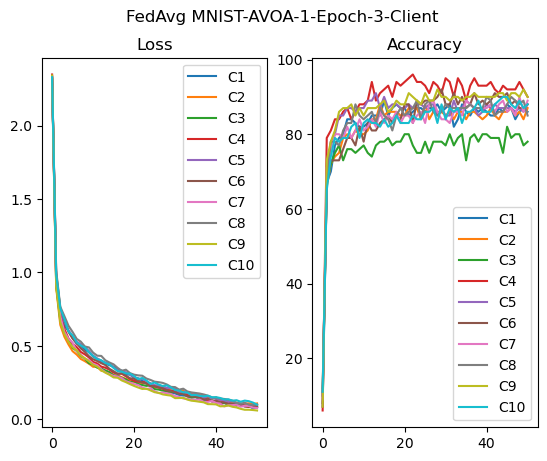

In [ ]:
def plot_acc_loss(title:str, loss_hist:list, acc_hist:list):
    plt.figure()
    
    plt.suptitle(title)

    plt.subplot(1,2,1)
    lines=plt.plot(loss_hist)
    plt.title("Loss")
    plt.legend(lines,["C1", "C2", "C3","C4", "C5", "C6","C7", "C8", "C9","C10"])

    plt.subplot(1,2,2)
    lines=plt.plot(acc_hist )
    plt.title("Accuracy")
    plt.legend(lines,["C1", "C2", "C3","C4", "C5", "C6","C7", "C8", "C9","C10"])
    

plot_acc_loss("FedAvg MNIST-AVOA-1-Epoch-3-Client", loss_hist_FA_iid, acc_hist_FA_iid)

import pickle


with open('acc.pickle', 'wb') as handle:
    pickle.dump(acc_hist_FA_iid, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('loss.pickle', 'wb') as handle:
    pickle.dump(loss_hist_FA_iid, handle, protocol=pickle.HIGHEST_PROTOCOL)